# Description (data of version September 2016)

### Files
The files for_yandex_x.root contain a single TTree called `T` that has all of the feautres we want to consider for various jet-tagging algorithms. The values of x mean:
* 0 = light parton,
* 4 = charm,
* 5 = beauty, 
i.e. 5 is b-jets, 4 is c-jets, and 0 is everything else. 

### Initial selection
Only jets with measured `pt > 20 GeV` and `2.2 < eta < 4.2` are kept in these samples. 

### Goal: jet tagging algorithms
We want to start by considering the following taggers:

- An SV tagger that requires an SV in the jet and uses features similar to what we used in the LHCb Run 1 tagger. This will now include anything given below that starts with SV, along with the feature SVPT / JetPT.  

- An SV tagger that requires an SV in the jet but uses not only SV features, but also whatever else is useful.

- A muon tagger that requires a muon in the jet and uses only Mu features, along with MUPT / JetPT. 

- A hardest-track tagger that uses features of the highest-pt track in the jet, along with HardPT / JetPT.

- A tagger that requires zero SVs, but can use whatever else is useful. 

In each case, we want to consider separation of b, c, and light, though some of these may only be useful for b OR c vs light.

To remind you, in Run 1 the SV tagger used 
* SVM,
* SVMCor, 
* SVMINPERP, 
* SVPT/JetPT, 
* SVDR, 
* SVN, 
* SVNJ, 
* abs(SVQ), 
* log(SVSumIPChi2). 


### Features
The features kept for each jet are list below with descriptions. 

#### True features
Features that starts with "True" is truth-level information we can use for labeling, but cannot be used in the classification algorithm since in experimental data we don't have this. 

- TrueParton is the truth-level parton that the jet matches to. This should be +-5(+-4) for all jets in the beauty(charm) file, and various numbers that correspond to u,d,s,g for light jets.

- TrueMaxBPT is the true maximum b-hadron pt within the jet. This should be zero except for b-jets.

- TrueMaxCPT is the true maximum c-hadron pt within the jet. This should be zero for light jets. It can be non-zero for b-jets since many contain a b --> c decay. 

- TrueJet(Px,Py,Pz,E) is the true 4-momentum of the jet. 

#### Jet properties
Features that start with "Jet" are properities that all jets have.

- Jet(PT,ETA) is the measured jet pt(eta).

- JetSigma(1,2) is the "jet width" along the major and minor axes. 

- JetQ is the "jet charge".

- JetMult is the total number of charged and neutral particles in the jet. 

- JetNChr is the number of charged particles in the jet. 

- JetNNeu is the number of neutral particles in the jet. 

- JetPTD is another jet width type feature. 

#### Secondary vertex properties
Features that start with "SV" are only set for jets that have a secondary vertex associated to them. 

- NSV is the number of SVs in the jet. Only the one with the highest pt is given in the SV features.

- SV(X,Y,Z) is the position.

- SVPerp is `(SVX**2 + SVY**2)**0.5`.

- SV(Px,Py,Pz,E) is the 4-momentum of all tracks that make up the SV.

- SV(PT,ETA) are the transverse component and eta of the 4-momentum.

- SVM is the invariant mass.

- SVMCor is the corrected mass. 

- SVMINPERP is the minimum perp location of all 2-body SV contained in the n-body SV.

- SVDR is DeltaR between the direction of flight (PV to SV vector) and the jet axis.

- SVN is the number of tracks in the SV.

- SVNJ is the number of tracks in the SV that are also in the jet.

- SVQ is the net charge of the tracks in the SV (we usually only use its absolute value).

- SVSumIPChi2 is the sum of the IP chi2 of all tracks in the SV.

- SVTZ is the pseudo lifetime of the SV. 

- SVMINIPCHI2 is the min value of IP chi2 of all tracks in the SV.

- SVGhostMax is the max value of the ghost prob of all tracks in the SV.

#### Muon properties
Features that start with "Mu" are only for jets that contain a muon, which is defined as a track in the jet with ProbNNmu > 0.5 and PT > 500 MeV. 

- NMU is the number of muons in the jet.  If more than one, then only the one with the highest PT is reported in the Mu features. 

- MuPT is the pt of the muon.

- MuIPChi2 is the IP chi2 of the muon.

- MuDR is DeltaR between the muon and the jet axis. 

- MuPNN is ProbNNmu for the muon.


#### Properties of the highest-pt track in the jet
Features that start with "Hard" are for the highest-pt track in the jet.

- HardPT is its pt.

- HardIPChi2 is its IP chi2.

- HardDR is DeltaR between the hardest track and the jet axis. 


#### Other features

- PV(X,Y,Z) is the PV location.

- NDispl(6,9,16) is the number of tracks in the jet that have IP chi2 > (6,9,16).  Clearly these are highly correlated, so perhaps we should only consider using one of them.



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import root_numpy
import pandas

import sys
sys.path.insert(0, 'utils/')

In [3]:
import utils
from rep.metaml import FoldingClassifier
from rep.estimators import XGBoostClassifier

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Read the data

In [4]:
b_jets = pandas.DataFrame(root_numpy.root2array('datasets_2016_Sept/for_yandex_5.root', treename='T'))
c_jets = pandas.DataFrame(root_numpy.root2array('datasets_2016_Sept/for_yandex_4.root', treename='T'))
light_jets = pandas.DataFrame(root_numpy.root2array('datasets_2016_Sept/for_yandex_0.root', treename='T'))

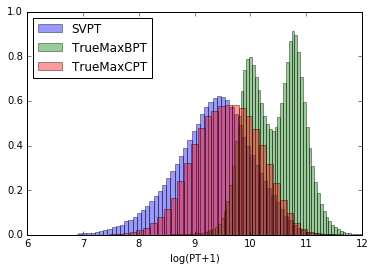

In [5]:
hist(numpy.log(b_jets.SVPT[b_jets.SVPT > -999] + 1), bins=100, alpha=0.4, normed=True, label='SVPT');
hist(numpy.log(b_jets.TrueMaxBPT[b_jets.TrueMaxBPT > -999] + 1), bins=100, alpha=0.4, normed=True, label='TrueMaxBPT');
hist(numpy.log(b_jets.TrueMaxCPT[b_jets.TrueMaxCPT > -999] + 1), bins=100, alpha=0.4, normed=True, label='TrueMaxCPT');
xlabel('log(PT+1)')
xlim(6, 12)
legend(loc='best')

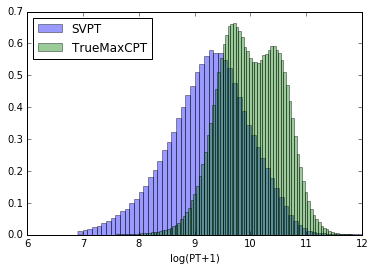

In [6]:
hist(numpy.log(c_jets.SVPT[c_jets.SVPT > -999] + 1), bins=100, alpha=0.4, normed=True, label='SVPT');
hist(numpy.log(c_jets.TrueMaxCPT[c_jets.TrueMaxCPT > -999] + 1), bins=100, alpha=0.4, normed=True, label='TrueMaxCPT');
xlabel('log(PT+1)')
xlim(6, 12)
legend(loc='best')

In [7]:
print len(b_jets), sum(abs(b_jets.TrueParton) == 5), sum(b_jets.TrueMaxBPT != 0), sum(b_jets.TrueMaxCPT != 0)
print len(c_jets), sum(abs(c_jets.TrueParton) == 4), sum(c_jets.TrueMaxBPT != 0), sum(c_jets.TrueMaxCPT != 0)
print len(light_jets), sum(light_jets.TrueParton != -1000), sum(light_jets.TrueMaxBPT != 0), sum(light_jets.TrueMaxCPT != 0)

1176550 1176550 1176550 1101842
1268093 1268093 0 1268093
328977 328977 0 0


In [8]:
b_jets, c_jets, light_jets = utils.add_features(b_jets, c_jets, light_jets)

In [9]:
b_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,SV_theta,SVM_rel,SV_Q_N_rel,SV_Q_abs,SV_cos_angle,JetSigma1toJetSigma2,JetSigma1multJetSigma2,SVPTtoJetPT,MuPTtoJetPT,HardPTtoJetPT
0,5,17633.682312,6740.255618,-5755.97,-16674.51,515023.76,515349.118636,24319.124790,3.963454,0.167547,...,0.754625,0.075659,0.0,0,0.999487,1.392748,0.020156,0.141691,-0.041120,0.266896
1,5,14018.186474,7494.051081,25248.38,-6732.63,269911.29,271314.621876,23297.508840,3.005670,0.217980,...,0.000000,0.709777,0.2,1,0.999330,1.436719,0.033072,0.299777,-0.042923,0.121852
2,5,19639.972596,11968.533091,-19748.24,3521.12,89582.65,91888.056364,23719.662697,2.210880,0.170647,...,0.177262,0.559617,0.5,2,0.979789,2.536986,0.011478,0.551961,-0.042159,0.308476
3,5,23047.556741,11952.634665,4457.80,-24709.15,169722.14,171713.585989,26006.902109,2.591552,0.123072,...,0.361457,0.315337,0.0,0,-0.326854,1.333433,0.011359,0.515027,-0.038451,0.231092
4,5,15040.377664,5199.804785,-16446.17,-2246.46,243727.69,244340.283371,20309.128691,3.398945,0.073169,...,-0.000000,0.693147,1.0,1000,1.000000,1.055876,0.005070,-0.049239,-0.049239,0.292027


In [10]:
c_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,SV_theta,SVM_rel,SV_Q_N_rel,SV_Q_abs,SV_cos_angle,JetSigma1toJetSigma2,JetSigma1multJetSigma2,SVPTtoJetPT,MuPTtoJetPT,HardPTtoJetPT
0,4,0,6655.137192,21363.34,-753.02,291365.69,292258.158800,23664.823260,3.178848,0.219161,...,0.46668,0.410880,0,0,0.999614,1.319506,0.036401,0.106562,-0.042257,0.104828
1,4,0,7000.954325,-24970.81,1297.54,289446.02,290653.950785,23060.565666,3.094483,0.159110,...,-0.00000,0.693147,1,1000,1.000000,2.216375,0.011422,-0.043364,-0.043364,0.191026
2,4,0,10219.198792,23036.25,-7024.74,120649.14,123295.340064,21913.679443,2.275844,0.182635,...,-0.00000,0.693147,1,1000,1.000000,1.296748,0.025723,-0.045634,-0.045634,0.124898
3,4,0,9941.712343,-6611.81,-20933.26,175855.81,177495.056633,28447.919150,2.634802,0.122404,...,-0.00000,0.693147,1,1000,1.000000,1.402262,0.010685,-0.035152,-0.035152,0.155036
4,4,0,15346.944879,2764.13,20619.88,232347.56,233343.063964,23583.855771,3.068167,0.104452,...,-0.00000,0.693147,1,1000,1.000000,2.798610,0.003898,-0.042402,-0.042402,0.126085


In [11]:
light_jets.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,SV_theta,SVM_rel,SV_Q_N_rel,SV_Q_abs,SV_cos_angle,JetSigma1toJetSigma2,JetSigma1multJetSigma2,SVPTtoJetPT,MuPTtoJetPT,HardPTtoJetPT
0,1,0,0,-27319.74,47085.50,452825.60,456137.075572,48022.687206,2.814516,0.061062,...,-0,0.693147,1,1000,1,1.990852,0.001873,-0.020823,-0.020823,0.376906
1,1,0,0,13698.42,-28216.77,297734.11,299538.592824,25613.918725,2.950437,0.212729,...,-0,0.693147,1,1000,1,1.892553,0.023911,-0.039041,-0.039041,0.120861
2,21,0,0,-19886.68,11777.38,106293.22,108900.656144,28613.420596,2.227800,0.115453,...,-0,0.693147,1,1000,1,1.240925,0.010742,-0.034949,-0.034949,0.184257
3,21,0,0,36211.56,-28213.17,626404.72,628247.727743,33615.583226,3.265237,0.160689,...,-0,0.693147,1,1000,1,1.513406,0.017061,-0.029748,-0.029748,0.110473
4,21,0,0,-18730.86,16806.38,299692.72,300855.176970,27773.950744,3.133306,0.123675,...,-0,0.693147,1,1000,1,1.597890,0.009572,-0.036005,-0.036005,0.148521


In [12]:
true_features = filter(lambda x: x.startswith('True'), b_jets.columns)
SV_features = filter(lambda x: x.startswith('SV'), b_jets.columns)
jet_features = filter(lambda x: x.startswith('Jet'), b_jets.columns)
muon_features = filter(lambda x: x.startswith('Mu'), b_jets.columns)
hard_features = filter(lambda x: x.startswith('Hard'), b_jets.columns)
other_features = ['PVX', 'PVY', 'PVZ', 'NDispl6', 'NDispl9', 'NDispl16']

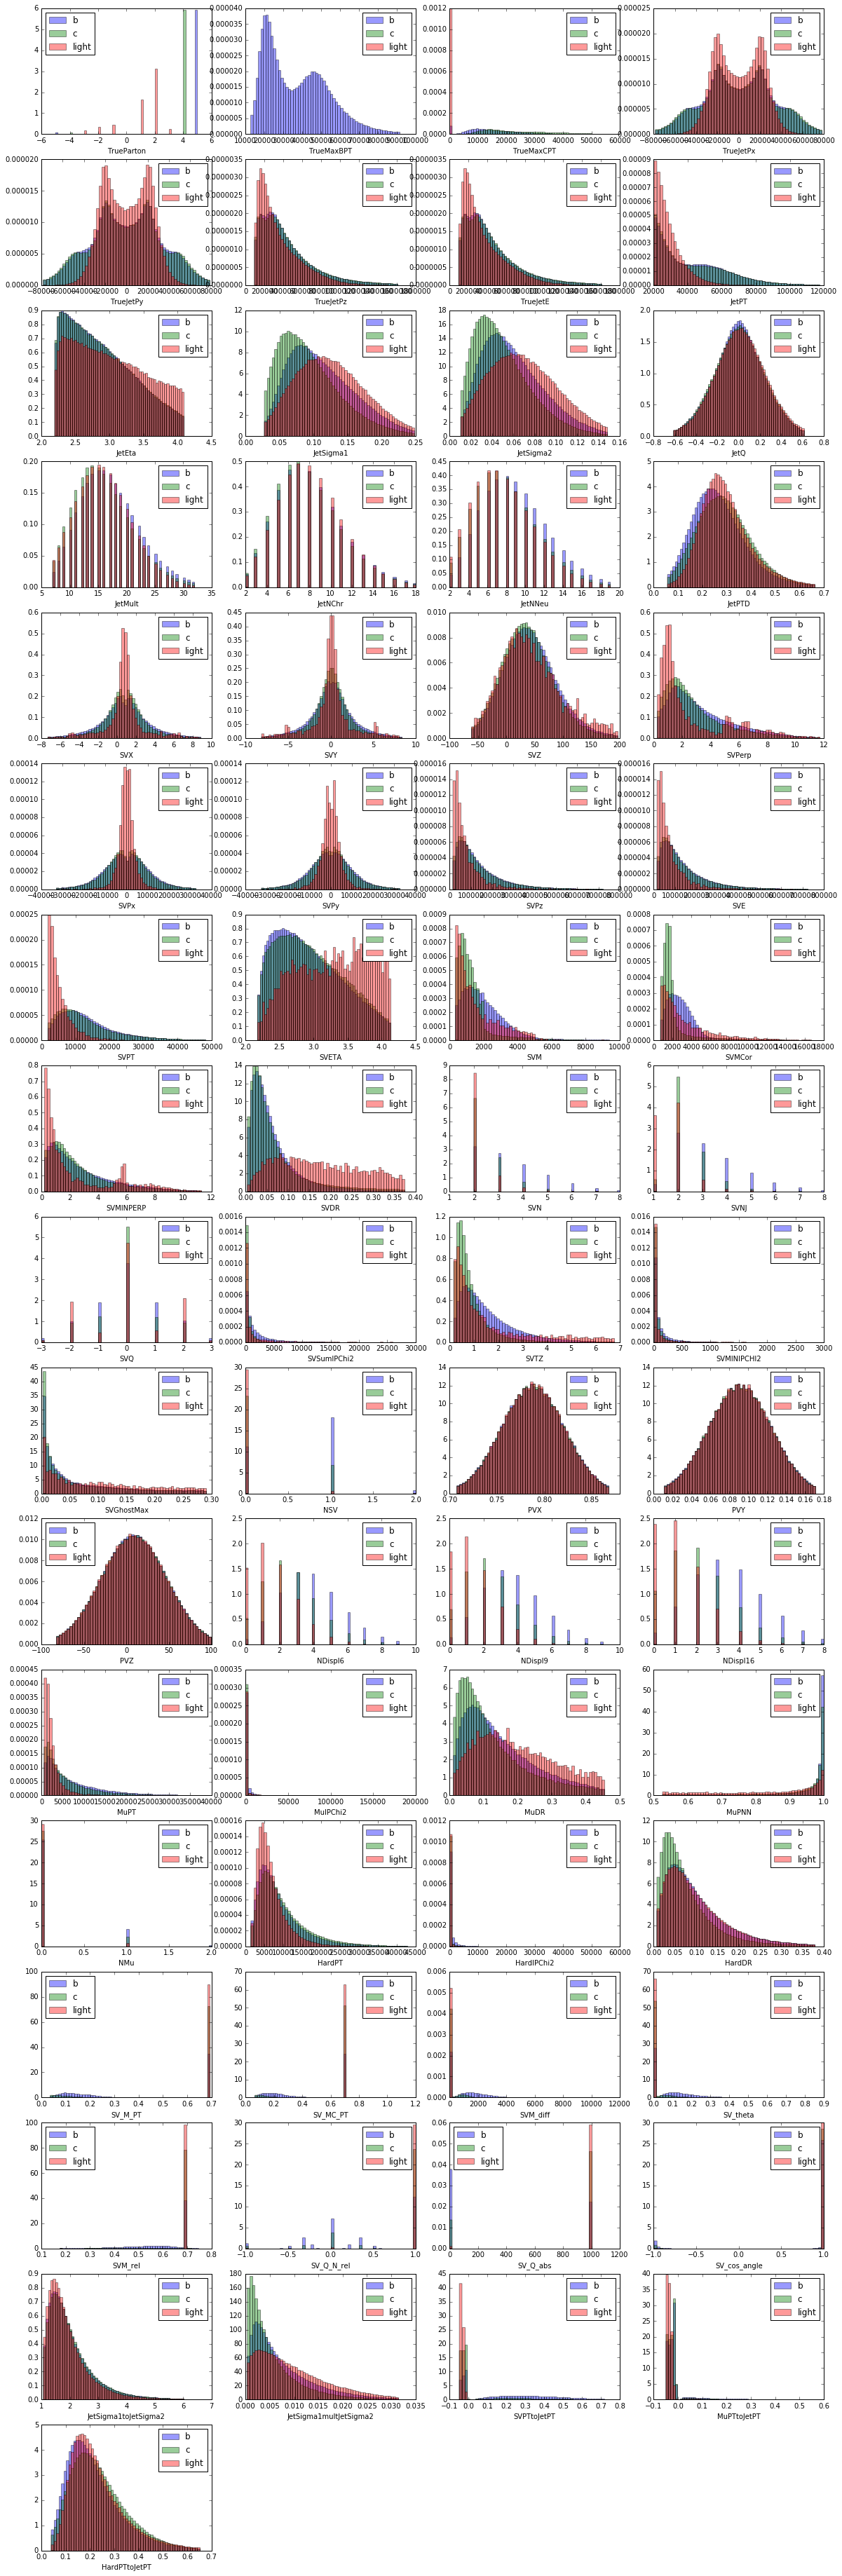

In [13]:
plt.figure(figsize=(20, 65))
kw_hist = {'normed': True, 'bins': 60, 'alpha': 0.4}
for n, name in enumerate(b_jets.columns):
    plt.subplot(17, 4, n + 1)
    val = numpy.percentile(b_jets[b_jets[name] != -1000][name].values, [1, 99])
    plt.hist(b_jets[b_jets[name] != -1000][name].values, label='b', range=val, **kw_hist)
    plt.hist(c_jets[c_jets[name] != -1000][name].values, label='c', range=val, **kw_hist)
    plt.hist(light_jets[light_jets[name] != -1000][name].values, range=val, label='light', **kw_hist)
    plt.legend(loc='best')
    plt.xlabel(name)

In [14]:
data = pandas.concat([b_jets, c_jets, light_jets], axis=0)
data['Label'] = [0] * len(b_jets) + [1] * len(c_jets) + [2] * len(light_jets)

In [15]:
def fit_model(data, selection, model):
    data_fit = data.query(selection)
    data_fit['Weight'] = utils.compute_weights(data_fit['Label'].values)
    print 'Classes', sum(data_fit.Label == 0), sum(data_fit.Label == 1), sum(data_fit.Label == 2) 
    model.fit(data_fit, data_fit.Label, data_fit.Weight)
    utils.plot_feature_importances(model.feature_importances_, model.features)
    plt.show()
    predictions = model.predict_proba(data_fit)
    utils.generate_plots({i: predictions[:, i] for i in range(3)},
                         data_fit.Label.values, data_fit.Weight.values, data_fit)
    plt.show()
    return model

## SV tagger

An SV tagger that requires an SV in the jet and uses features similar to what we used in the LHCb Run 1 tagger. This will now include anything given below that starts with SV, along with the feature SVPT / JetPT.

#### Data Selection

In [16]:
sv_selection = '(TrueParton != -1000) & (NSV > 0)'

#### XGBoost training

In [17]:
print SV_features

['SVX', 'SVY', 'SVZ', 'SVPerp', 'SVPx', 'SVPy', 'SVPz', 'SVE', 'SVPT', 'SVETA', 'SVM', 'SVMCor', 'SVMINPERP', 'SVDR', 'SVN', 'SVNJ', 'SVQ', 'SVSumIPChi2', 'SVTZ', 'SVMINIPCHI2', 'SVGhostMax', 'SV_M_PT', 'SV_MC_PT', 'SVM_diff', 'SV_theta', 'SVM_rel', 'SV_Q_N_rel', 'SV_Q_abs', 'SV_cos_angle', 'SVPTtoJetPT']


/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Classes 740807 288550 5702


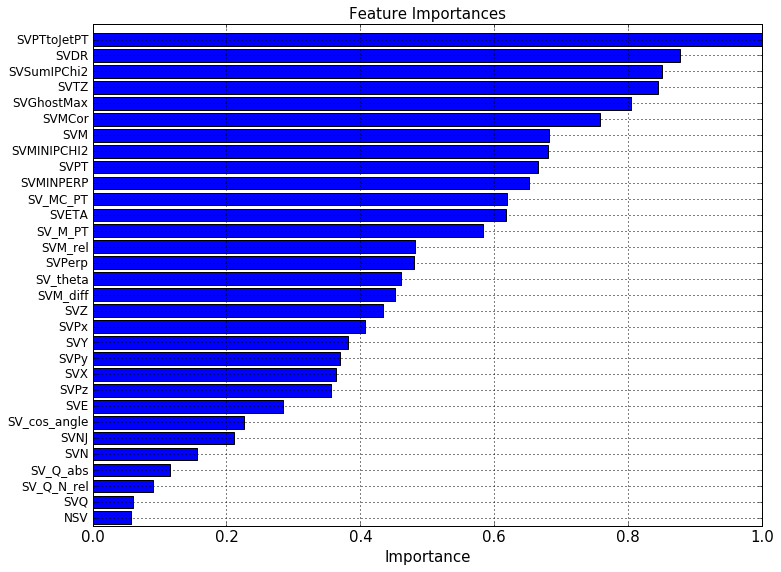

KFold prediction using folds column
     b jets    c jets  light jets
0  0.920847  0.894016    0.954482


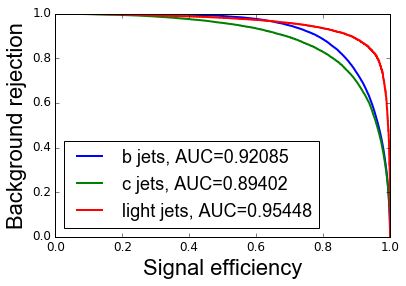

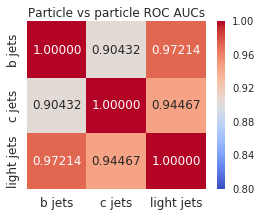

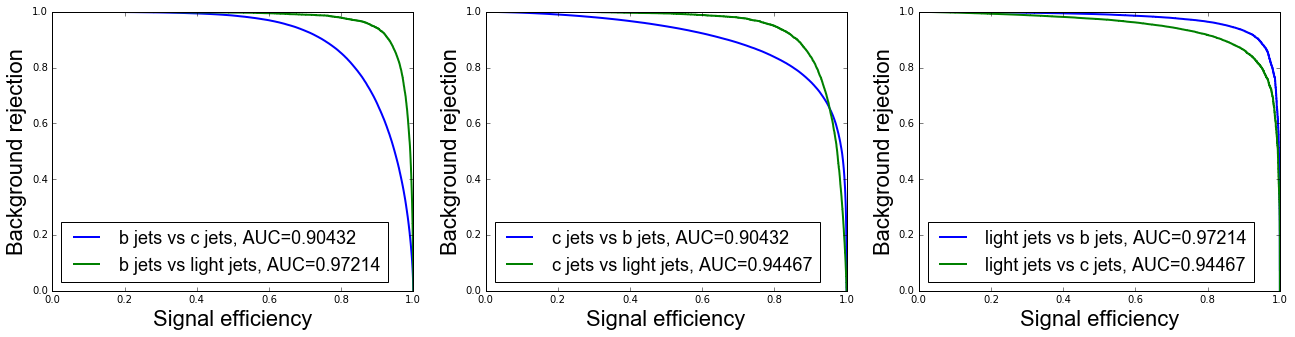

CPU times: user 1h 9min 8s, sys: 8.03 s, total: 1h 9min 16s
Wall time: 7min 38s


In [19]:
%%time 
from rep.metaml import FoldingClassifier
from rep.estimators import XGBoostClassifier

xgb_sv = FoldingClassifier(XGBoostClassifier(nthreads=12, 
                                             eta=0.05, 
                                             n_estimators=200, 
                                             max_depth=9, 
                                             subsample=0.5, 
                                             min_child_weight=100, 
                                             colsample=0.7),
                          features=SV_features + ['NSV'], random_state=42)
xgb_sv = fit_model(data, sv_selection, xgb_sv)

### one vs one

In [22]:
from sklearn.base import clone
xgb_base = FoldingClassifier(XGBoostClassifier(nthreads=12, eta=0.05, 
                                               n_estimators=200, 
                                               max_depth=9, 
                                               subsample=0.5, 
                                               min_child_weight=100, 
                                               colsample=0.7),
                             features=SV_features + ['NSV'], random_state=42)
xgb_b_c = clone(xgb_base)
xgb_c_light = clone(xgb_base)
xgb_b_light = clone(xgb_base)

data_sv = data.query(sv_selection)
data_sv['Weight'] = utils.compute_weights(data_sv['Label'].values)

mask_b_c = data_sv.Label != 2
mask_b_light = data_sv.Label != 1
mask_c_light = data_sv.Label != 0

xgb_b_c.fit(data_sv[mask_b_c], data_sv.loc[mask_b_c, 'Label'] == 0, data_sv.loc[mask_b_c, 'Weight'])
xgb_c_light.fit(data_sv[mask_c_light], data_sv.loc[mask_c_light, 'Label'] == 1 , data_sv.loc[mask_c_light, 'Weight'])
xgb_b_light.fit(data_sv[mask_b_light], data_sv.loc[mask_b_light, 'Label'] == 0 , data_sv.loc[mask_b_light, 'Weight'])

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


FoldingClassifier(base_estimator=XGBoostClassifier(base_score=0.5, colsample=0.7, eta=0.05, features=None,
         gamma=None, max_depth=9, min_child_weight=100, missing=-999.0,
         n_estimators=200, nthreads=12, num_feature=None, random_state=0,
         scale_pos_weight=1.0, subsample=0.5, verbose=0),
         features=['SVX', 'SVY', 'SVZ', 'SVPerp', 'SVPx', 'SVPy', 'SVPz', 'SVE', 'SVPT', 'SVETA', 'SVM', 'SVMCor', 'SVMINPERP', 'SVDR', 'SVN', 'SVNJ', 'SVQ', 'SVSumIPChi2', 'SVTZ', 'SVMINIPCHI2', 'SVGhostMax', 'SV_M_PT', 'SV_MC_PT', 'SVM_diff', 'SV_theta', 'SVM_rel', 'SV_Q_N_rel', 'SV_Q_abs', 'SV_cos_angle', 'SVPTtoJetPT', 'NSV'],
         n_folds=2, parallel_profile=None, random_state=42)

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
print roc_auc_score(data_sv.loc[mask_b_c, 'Label'] == 0, xgb_b_c.predict_proba(data_sv[mask_b_c])[:, 1], 
                    sample_weight=data_sv.loc[mask_b_c, 'Weight'])
print roc_auc_score(data_sv.loc[mask_c_light, 'Label'] == 1, xgb_c_light.predict_proba(data_sv[mask_c_light])[:, 1], 
                    sample_weight=data_sv.loc[mask_c_light, 'Weight'])
print roc_auc_score(data_sv.loc[mask_b_light, 'Label'] == 0, xgb_b_light.predict_proba(data_sv[mask_b_light])[:, 1], 
                    sample_weight=data_sv.loc[mask_b_light, 'Weight'])

KFold prediction using folds column
0.906709157827
KFold prediction using folds column
0.945504203124
KFold prediction using folds column
0.972368429063


## SV+ tagger

An SV tagger that requires an SV in the jet but uses not only SV features, but also whatever else is useful.

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Classes 740807 288550 5702


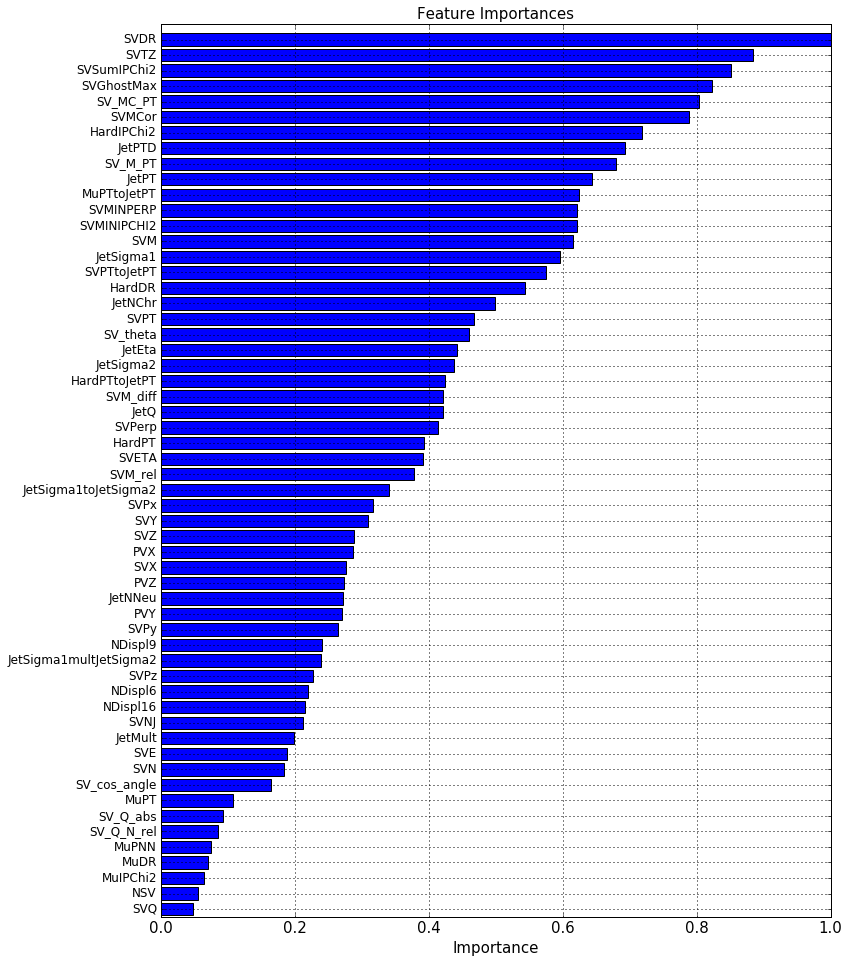

KFold prediction using folds column
     b jets    c jets  light jets
0  0.937595  0.909115    0.965842


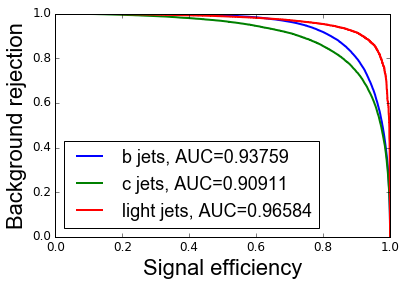

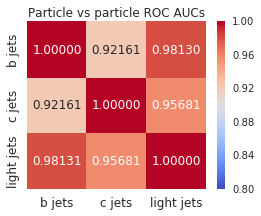

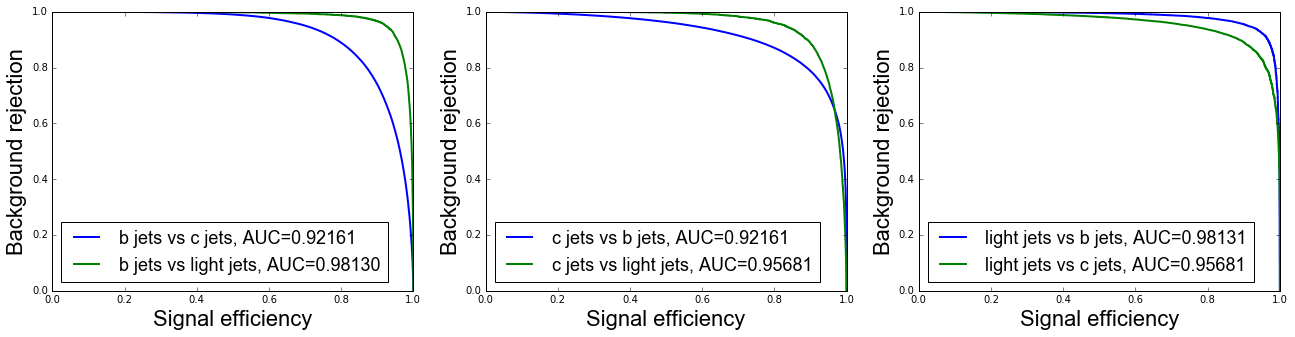

CPU times: user 2h 17min 28s, sys: 9.83 s, total: 2h 17min 38s
Wall time: 13min 54s


In [25]:
%%time
xgb_sv_all = FoldingClassifier(XGBoostClassifier(nthreads=12, 
                                                 eta=0.05, 
                                                 n_estimators=200, 
                                                 max_depth=9, 
                                                 subsample=0.5, 
                                                 min_child_weight=100, 
                                                 colsample=0.7),
                               features=SV_features + ['NSV'] + \
                                   jet_features + muon_features + hard_features + other_features, 
                               random_state=42)
xgb_sv_all = fit_model(data, sv_selection, xgb_sv_all)

## Muon tagger

A muon tagger that requires a muon in the jet and uses only Mu features, along with MUPT / JetPT.

#### Data Selection

In [26]:
muon_selection = '(TrueParton != -1000) & (NMu > 0)'

In [27]:
print muon_features

['MuPT', 'MuIPChi2', 'MuDR', 'MuPNN', 'MuPTtoJetPT']


#### XGBoost training

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Classes 181080 106648 9892


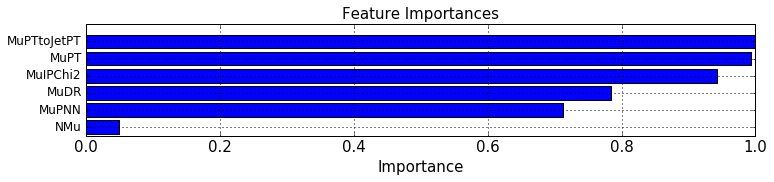

KFold prediction using folds column
     b jets    c jets  light jets
0  0.847476  0.756567    0.902031


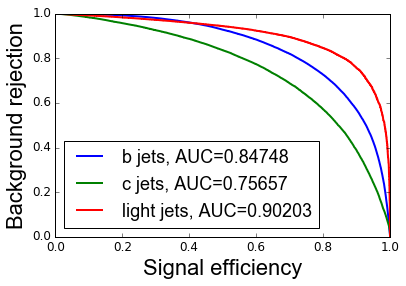

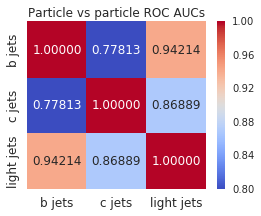

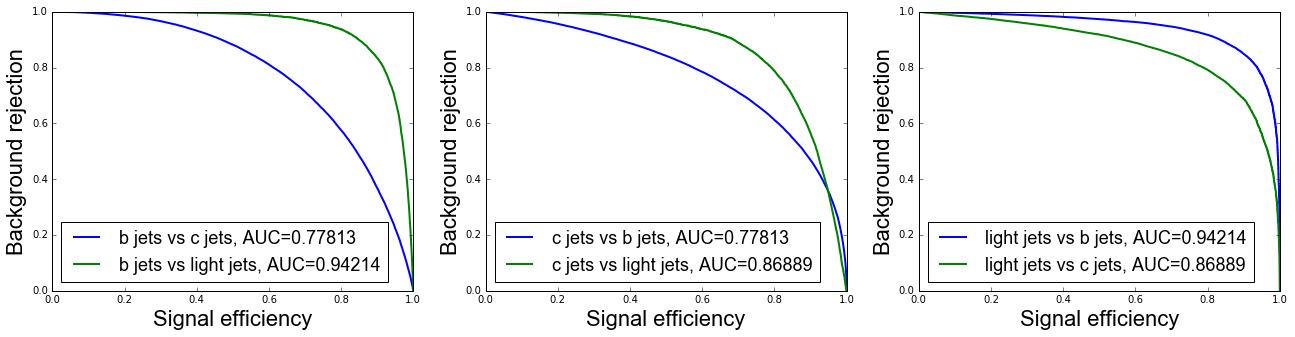

In [28]:
xgb_muon = FoldingClassifier(XGBoostClassifier(nthreads=12, 
                                               eta=0.05, 
                                               n_estimators=200, 
                                               max_depth=6, 
                                               subsample=0.5, 
                                               min_child_weight=100, 
                                               colsample=0.7),
                             features=muon_features + ['NMu'],
                             random_state=42)
xgb_muon = fit_model(data, muon_selection, xgb_muon)

## Hardest tagger

A hardest-track tagger that uses features of the highest-pt track in the jet, along with HardPT / JetPT.

#### Data Selection

In [29]:
hard_selection = '(TrueParton != -1000)'

In [30]:
print hard_features

['HardPT', 'HardIPChi2', 'HardDR', 'HardPTtoJetPT']


#### XGBoost training

Classes 1176550 1268093 328977


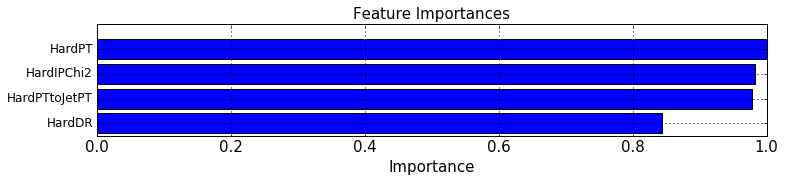

KFold prediction using folds column
     b jets    c jets  light jets
0  0.799795  0.676243    0.829242


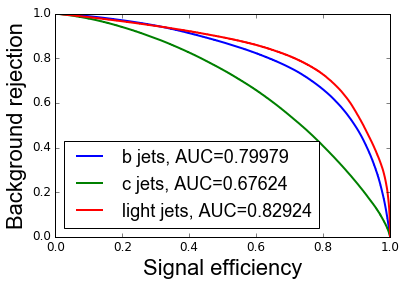

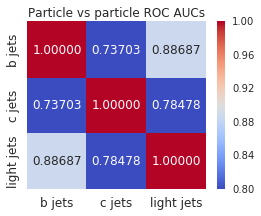

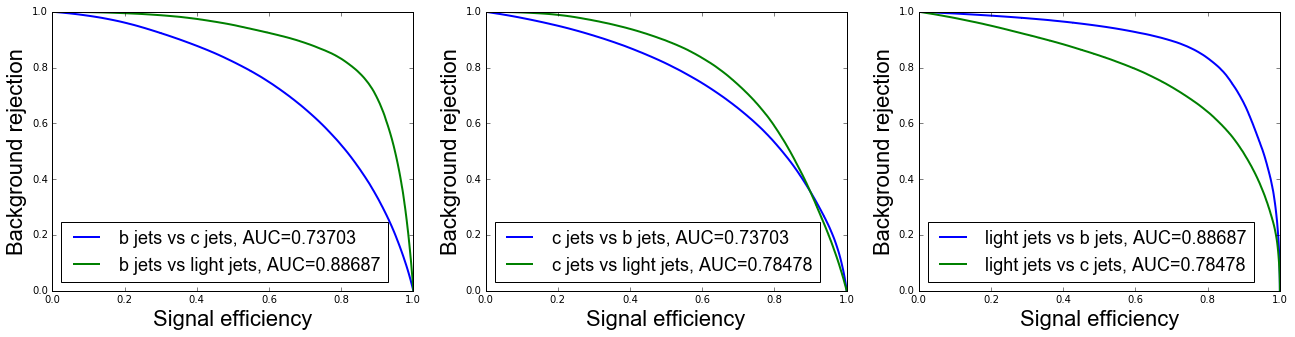

In [31]:
xgb_hard = FoldingClassifier(XGBoostClassifier(nthreads=12, 
                                               eta=0.05, 
                                               n_estimators=200, 
                                               max_depth=5, 
                                               subsample=0.5, 
                                               min_child_weight=100, 
                                               colsample=0.7),
                             features=hard_features,
                             random_state=42)
xgb_hard = fit_model(data, hard_selection, xgb_hard)

## Zero-SV tagger

A tagger that requires zero SVs, but can use whatever else is useful.

#### Data Selection

In [32]:
zero_sv_selection = '(TrueParton != -1000) & (NSV == 0)'

#### XGBoost training

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Classes 435743 979543 323275


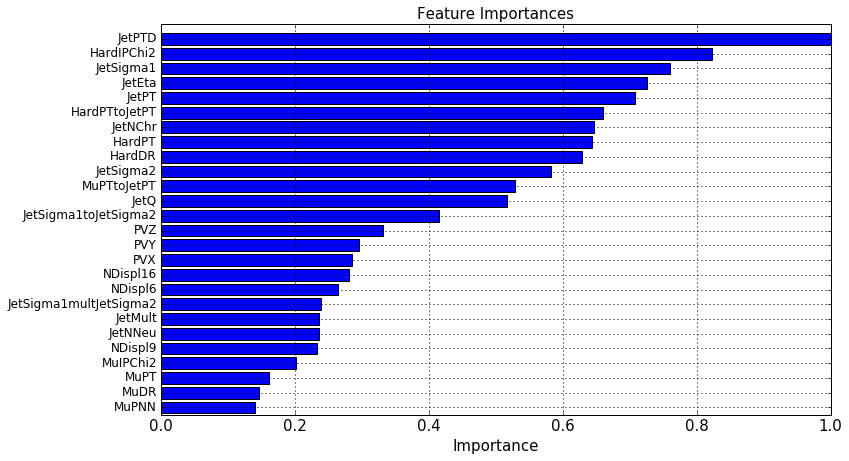

KFold prediction using folds column
    b jets    c jets  light jets
0  0.84063  0.743907    0.873109


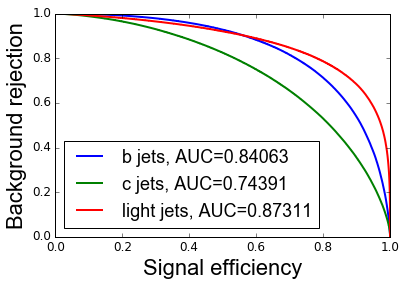

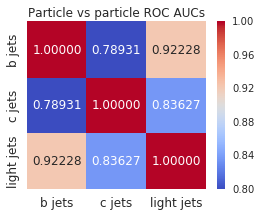

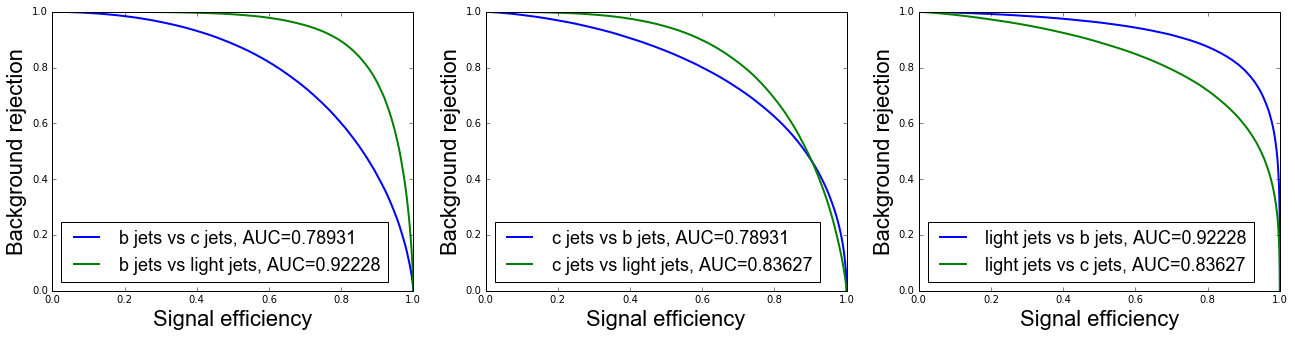

In [34]:
xgb_zero = FoldingClassifier(XGBoostClassifier(nthreads=12, 
                                               eta=0.05, 
                                               n_estimators=200, 
                                               max_depth=9, 
                                               subsample=0.5, 
                                               min_child_weight=100, 
                                               colsample=0.7),
                             features=jet_features + muon_features + hard_features + other_features,
                             random_state=42)
xgb_zero = fit_model(data, zero_sv_selection, xgb_zero)

## Add predictions to files

In [37]:
predictions = {}
for name, cl, selection in zip(['BDT_SV', 'BDT_SV_EXT', 'BDT_MUON', 'BDT_HARD', 'BDT_ZERO_SV'], 
                               [xgb_sv, xgb_sv_all, xgb_muon, xgb_hard, xgb_zero],
                               [sv_selection, sv_selection, muon_selection, hard_selection, zero_sv_selection]):
    pred = numpy.zeros(shape=(len(data), 3)) - 1
    mask = data.eval(selection).values
    pred[mask, :] = cl.predict_proba(data.loc[mask, :])
    predictions[name] = pred

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


In [42]:
for key in predictions.keys():
    for i, name in zip(range(3), ['_b', '_c', '_light']):
        data[key + name] = predictions[key][:, i]

In [43]:
data.head()

,TrueParton,TrueMaxBPT,TrueMaxCPT,TrueJetPx,TrueJetPy,TrueJetPz,TrueJetE,JetPT,JetEta,JetSigma1,...,BDT_MUON_light,BDT_HARD_b,BDT_HARD_c,BDT_HARD_light,BDT_SV_EXT_b,BDT_SV_EXT_c,BDT_SV_EXT_light,BDT_ZERO_SV_b,BDT_ZERO_SV_c,BDT_ZERO_SV_light
0,5,17633.682312,6740.255618,-5755.97,-16674.51,515023.76,515349.118636,24319.124790,3.963454,0.167547,...,-1,0.777213,0.103552,0.119235,0.798127,0.116591,0.085282,-1.000000,-1.00000,-1.000000
1,5,14018.186474,7494.051081,25248.38,-6732.63,269911.29,271314.621876,23297.508840,3.005670,0.217980,...,-1,0.280588,0.327966,0.391446,0.845877,0.080590,0.073532,-1.000000,-1.00000,-1.000000
2,5,19639.972596,11968.533091,-19748.24,3521.12,89582.65,91888.056364,23719.662697,2.210880,0.170647,...,-1,0.622244,0.248084,0.129672,0.991824,0.006987,0.001189,-1.000000,-1.00000,-1.000000
3,5,23047.556741,11952.634665,4457.80,-24709.15,169722.14,171713.585989,26006.902109,2.591552,0.123072,...,-1,0.650920,0.155702,0.193378,0.928405,0.040647,0.030947,-1.000000,-1.00000,-1.000000
4,5,15040.377664,5199.804785,-16446.17,-2246.46,243727.69,244340.283371,20309.128691,3.398945,0.073169,...,-1,0.169343,0.389291,0.441366,-1.000000,-1.000000,-1.000000,0.214964,0.46436,0.320676


In [44]:
root_numpy.array2root(data[data.Label == 0].to_records(index=False), 
                      'datasets_2016_Sept/predicted/jets_5.root', 
                      treename='T')
root_numpy.array2root(data[data.Label == 1].to_records(index=False), 
                      'datasets_2016_Sept/predicted/jets_4.root', 
                      treename='T')
root_numpy.array2root(data[data.Label == 2].to_records(index=False), 
                      'datasets_2016_Sept/predicted/jets_0.root', 
                      treename='T')